In [1]:
import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import ticker
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import dbscan
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.feature_selection import r_regression, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils._testing import ignore_warnings
from tabulate import tabulate
from xgboost import XGBClassifier

%matplotlib inline


In [2]:
pd.set_option('display.show_dimensions', True)
pd.set_option('display.max_columns', 200)

# Load Data

In [3]:
# df = pd.read_csv('~/Downloads/creditcard dataset.csv')
!rm -r data/
!gdown --id 1T7vO3VUlacA-gj_B-rlJXXbOJea_XlKN

#save Dataset to dataframe
df = pd.read_csv('creditcard dataset.csv')

rm: cannot remove 'data/': No such file or directory
/bin/bash: line 1: gdown: command not found


# Inspect Data

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Classification

## Data Split

In [8]:
x = df.drop('Class', axis=1)
y = df['Class']

## Data Imbalance Adjustment

### Oversampling

In [9]:
# oversampling using SMOTE
smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(x, y)

In [10]:
counter = Counter(y)
print(counter)
counter = Counter(y_smote)
print(counter)

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [11]:
print(x.shape)
print(x_smote.shape)

(284807, 30)
(568630, 30)


### Undersampling

In [12]:
# undersampling using random undersampler
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x, y)

In [13]:
counter = Counter(y)
print(counter)
counter = Counter(y_rus)
print(counter)

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [14]:
print(x.shape)
print(x_rus.shape)

(284807, 30)
(984, 30)


In [15]:
# create a new dataframe for SMOTE
df_smote = x_smote.copy(deep=True)
df_smote['Class'] = y_smote

# drop indices from the SMOTE dataset randomly
# np.random.seed(10)
# remove_n = int(len(df_smote) / 2)
# drop_indices = np.random.choice(df_smote.index, remove_n, replace=False)
# df_smote.drop(drop_indices, inplace=True)

# replace x_smote and y_smote
# x_smote = df_smote.drop('Class', axis=1)
# y_smote = df_smote['Class']

# create a new dataframe for RUS
df_rus = x_rus.copy(deep=True)
df_rus['Class'] = y_rus

In [16]:
ts = 0.3
rs = 1

x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(
    x, y, test_size=ts, random_state=rs)

x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=ts, random_state=rs)

x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(
    x_rus, y_rus, test_size=ts, random_state=rs)

In [17]:
print(len(df))
print(len(df_smote))
print(len(df_rus))
print(len(x_smote))
print(len(x_train_smote))
print(len(y_smote))

284807
568630
984
568630
398041
568630


# Model Creation

In [18]:
# build the classifier class
# import ray

# # ray.init(ignore_reinit_error=True)


# # @ray.remote
# @ignore_warnings(category=ConvergenceWarning)
class ClassifierModels():
    def __init__(self, df, x, y, x_test, y_test):
        '''Init function. Make sure to pass x_train and y_train here.'''

        self.df = df
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test

        print('#' * 60)
        print(f'{" Loading dataframe ":#^60}')
        print('#' * 60)
        print(f'{" Getting best parameters to create our models ":#^60}')
        print('#' * 60)

        # hold abbreviations and full names
        self.model_abr = {'lr': 'Logistic Regression', 'knn': 'KNeighbors Classifier', 'dtc': 'Decision Tree Classifier',
                          'rfc': 'Random Forest Classifier', 'ensemble': 'Voting Classifier', 'xgb': 'XGB Classifier', 'nb': 'Naive Bayes'}
        # self.model_abr = {'lr': 'Logistic Regression', 'svm': 'Support Vector Machine', 'dtc': 'Decision Tree Classifier',
        #                   'rfc': 'Random Forest Classifier', 'ensemble': 'Voting Classifier', 'xgb': 'XGB Classifier', 'nb': 'Naive Bayes'}

        # hold the actual models
        self.models = {}
        self.model_predicts = {}
        self.model_predicts_proba = {}

        # loop over the models dict to get each model's best params
        for model in self.model_abr:
            print('#' * 60)
            print(f'{" " + self.model_abr[model] + " ":#^60}')
            print('#' * 60)
            # params = self.get_best_params(model)

            # print('+++++ Best parameters for the {} model: {}'.format(
            #     self.model_abr[model], params))
            print('+++++ Creating and fitting the {} model using its default parameters...'.format(
                self.model_abr[model]))

            if model == 'lr':
                # m = LogisticRegression(
                #     solver=params['solver'], penalty=params['penalty'], C=params['C'])
                m = LogisticRegression(solver='lbfgs', max_iter=500, n_jobs=-1)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'knn':
                # m = KNeighborsClassifier(
                #     n_neighbors=params['n_neighbors'], weights=params['weights'], metric=params['metric'])
                m = KNeighborsClassifier(n_jobs=-1)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'svm':
                # m = SVC(kernel=params['kernel'],
                #         C=params['C'], gamma=params['gamma'], probability=True)
                m = SVC(n_jobs=-1, probability=True)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'dtc':
                # m = DecisionTreeClassifier(
                #     criterion=params['criterion'], splitter=params['splitter'], max_features=params['max_features'])
                m = DecisionTreeClassifier()
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'rfc':
                # m = RandomForestClassifier(
                #     n_estimators=params['n_estimators'], max_features=params['max_features'])
                m = RandomForestClassifier(n_jobs=-1)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'ensemble':
                # m = VotingClassifier(estimators=[('Logistic Regression', self.models['lr']), ('Decission Tree Classifier', self.models['dtc']), (
                #     'Random Forrest Classifier', self.models['rfc']), ('KNN', self.models['knn']), ('SVM', self.models['svm'])], weights=[10, 10, 10, 10, 10], voting='soft')
                m = VotingClassifier(estimators=[('Logistic Regression', self.models['lr']), ('Decission Tree Classifier', self.models['dtc']), (
                    'Random Forrest Classifier', self.models['rfc']), ('KNN', self.models['knn'])], weights=[10, 10, 10, 10], voting='soft', n_jobs=-1)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'xgb':
                m = XGBClassifier(use_label_encoder=False, n_jobs=-1)
                m.fit(self.x, self.y)

                self.models[model] = m

            elif model == 'nb':
                m = GaussianNB()
                m.fit(self.x, self.y)

                self.models[model] = m

        print('#' * 60)
        print(f'{" All models created and fitted successfully! ":#^60}')
        print('#' * 60)

        # loop over the models and get the y_pred
        for model in self.model_abr:
            y_pred = self.models[model].predict(self.x_test)

            self.model_predicts[model] = y_pred

        # loop over the models and get the y_pred_proba
        for model in self.model_abr:
            y_pred_proba = self.models[model].predict_proba(self.x_test)

            self.model_predicts_proba[model] = y_pred_proba
            
        print('#' * 60)
        print(f'{" All model predictions generated successfully! ":#^60}')
        print('#' * 60)

    @ignore_warnings(category=ConvergenceWarning)
    def get_best_params(self, model):
        '''This method returns the best params for hypertuning each model'''

        if model == 'lr':
            # model
            lr_model = LogisticRegression()

            # params
            solver = ['newton-cg', 'lbfgs', 'liblinear']
            penalty = ['l2']
            C = [100, 10, 1.0, 0.1, 0.01]
            lr_params = dict(solver=solver, penalty=penalty, C=C)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            lr_gsearch = GridSearchCV(estimator=lr_model, param_grid=lr_params,
                                      cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            lr_gresult = lr_gsearch.fit(self.x, self.y)

            return lr_gresult.best_params_

        elif model == 'knn':
            # model
            knn_model = KNeighborsClassifier()

            # params
            n_neighbors = range(1, 31, 2)
            weights = ['uniform', 'distance']
            metric = ['euclidean', 'manhattan', 'minkowski']
            knn_params = dict(n_neighbors=n_neighbors,
                              weights=weights, metric=metric)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            knn_gsearch = GridSearchCV(estimator=knn_model, param_grid=knn_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            knn_gresult = knn_gsearch.fit(self.x, self.y)

            return knn_gresult.best_params_

        elif model == 'svm':
            # model
            svm_model = SVC()

            # params
            kernel = ['poly', 'rbf', 'sigmoid']
            C = [50, 10, 1.0, 0.1, 0.01]
            gamma = ['scale']
            svm_params = dict(kernel=kernel, C=C, gamma=gamma)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            svm_gsearch = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            svm_gresult = svm_gsearch.fit(self.x, self.y)

            return svm_gresult.best_params_

        elif model == 'dtc':
            # model
            dtc_model = DecisionTreeClassifier()

            # params
            criterion = ['gini', 'entropy', 'log_loss']
            splitter = ['best', 'random']
            max_features = ['sqrt', 'log2', None]
            dtc_params = dict(criterion=criterion,
                              splitter=splitter, max_features=max_features)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            dtc_gsearch = GridSearchCV(estimator=dtc_model, param_grid=dtc_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            dtc_gresult = dtc_gsearch.fit(self.x, self.y)

            return dtc_gresult.best_params_

        elif model == 'rfc':
            # model
            rfc_model = RandomForestClassifier()

            # params
            n_estimators = [10, 100, 1000]
            max_features = ['sqrt', 'log2']
            rfc_params = dict(n_estimators=n_estimators,
                              max_features=max_features)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            rfc_gsearch = GridSearchCV(estimator=rfc_model, param_grid=rfc_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            rfc_gresult = rfc_gsearch.fit(self.x, self.y)

            return rfc_gresult.best_params_

        elif model == 'ensemble':
            return

        elif model == 'xgb':
            return

        elif model == 'nb':
            return

        else:
            raise NameError(
                'No grid search model available for {}.'.format(model))

    def show_performance(self):
        '''This method prints the accuracy, precision, recall, and f1 score for each model.'''

        headers = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        tbldata = []
        for model in self.models:
            accuracy = metrics.accuracy_score(
                self.y_test, self.model_predicts[model])
            f1score = metrics.f1_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)
            precision = metrics.precision_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)
            recall = metrics.recall_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)

            tbldata.append([self.model_abr[model], accuracy,
                           precision, recall, f1score])

        return tabulate(tbldata, headers=headers, tablefmt="pretty")

In [19]:
# cm_base_ = ClassifierModels.remote(df, x_train_base, y_train_base, x_test_base, y_test_base)
# cm_smote_ = ClassifierModels.remote(df_smote, x_train_smote, y_train_smote, x_test_smote, y_test_smote)
# cm_rus_ = ClassifierModels.remote(df_rus, x_train_rus, y_train_rus, x_test_rus, y_test_rus)

# cm_base, cm_smote, cm_rus = ray.get([cm_base_, cm_smote_, cm_rus_])

In [20]:
# create a ClassifierModels object for the RUS dataset
cm_rus = ClassifierModels(
    df_rus, x_train_rus, y_train_rus, x_test_rus, y_test_rus)

############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

/srv/conda/envs/saturn/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


############################################################
###### All model predictions generated successfully! #######
############################################################


In [21]:
# create a ClassifierModels object for the SMOTE dataset
cm_smote = ClassifierModels(
    df_smote, x_train_smote, y_train_smote, x_test_smote, y_test_smote)


############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

/srv/conda/envs/saturn/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


############################################################
####################### Naive Bayes ########################
############################################################
+++++ Creating and fitting the Naive Bayes model using its default parameters...
############################################################
####### All models created and fitted successfully! ########
############################################################
############################################################
###### All model predictions generated successfully! #######
############################################################


In [22]:
# create a ClassifierModels object for the base dataset
cm_base = ClassifierModels(
    df, x_train_base, y_train_base, x_test_base, y_test_base)


############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

/srv/conda/envs/saturn/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


############################################################
####################### Naive Bayes ########################
############################################################
+++++ Creating and fitting the Naive Bayes model using its default parameters...
############################################################
####### All models created and fitted successfully! ########
############################################################
############################################################
###### All model predictions generated successfully! #######
############################################################


## Save Model

In [23]:
# save the model to disk
# filename = 'finalized_model.mdl'
# joblib.dump(model, filename)

for m in [cm_base, cm_smote, cm_rus]:
    if m == cm_base:
        suffix = '_base'
    elif m == cm_smote:
        suffix = '_smote'
    elif m == cm_rus:
        suffix = '_rus'
    
    for m_key in m.models:
        filename = m_key + suffix + '.mdl'
        joblib.dump(m.models[m_key], filename)
        
    # print(m.models)


These are the model files after dumping them to the disk:

`jovyan@w-mserg-credit-card-fraud-b7b08c17491b49c6a167364607542767qmrtz:~/workspace$ ls -lh *.mdl`

`-rw-r--r-- 1 jovyan jovyan  21K Nov  6 07:42 dtc_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 6.2K Nov  6 07:42 dtc_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan 111K Nov  6 07:42 dtc_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan  99M Nov  6 07:42 ensemble_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 1.4M Nov  6 07:42 ensemble_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan 216M Nov  6 07:42 ensemble_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan  48M Nov  6 07:42 knn_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 168K Nov  6 07:42 knn_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan  95M Nov  6 07:42 knn_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan 1.6K Nov  6 07:42 lr_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 1.6K Nov  6 07:42 lr_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan 1.6K Nov  6 07:42 lr_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan 2.2K Nov  6 07:42 nb_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 2.2K Nov  6 07:42 nb_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan 2.2K Nov  6 07:42 nb_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan 2.0M Nov  6 07:42 rfc_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 535K Nov  6 07:42 rfc_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan  14M Nov  6 07:42 rfc_smote.mdl`

`-rw-r--r-- 1 jovyan jovyan 230K Nov  6 07:42 xgb_base.mdl`

`-rw-r--r-- 1 jovyan jovyan 108K Nov  6 07:42 xgb_rus.mdl`

`-rw-r--r-- 1 jovyan jovyan 492K Nov  6 07:42 xgb_smote.mdl`

# Model Performance

## Comparison

In [24]:
print('Base Model Performance:\n', cm_base.show_performance(), sep='')
print('SMOTE Model Performance:\n', cm_smote.show_performance(), sep='')
print('RUS Model Performance:\n', cm_rus.show_performance(), sep='')

Base Model Performance:
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|                          |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|   Logistic Regression    | 0.9991222218320986 | 0.9990348142426473 | 0.9991222218320986 | 0.9990345597418585 |
|  KNeighbors Classifier   | 0.9984668141333989 | 0.9984691649023513 | 0.9984668141333989 | 0.9977449297998167 |
| Decision Tree Classifier | 0.9991456292499094 | 0.9991424900460074 | 0.9991456292499094 | 0.9991440437039558 |
| Random Forest Classifier | 0.9995084442259752 | 0.9994869114476634 | 0.9995084442259752 | 0.9994909145894662 |
|    Voting Classifier     | 0.9993562960102056 | 0.9993273452607245 | 0.9993562960102056 | 0.9992920104773629 |
|      XGB Classifier      | 0.9995435553526912 | 0.999525045538496  | 0

## ROC

Text(0.5, 1.0, 'ROC Curve for RUS Model')

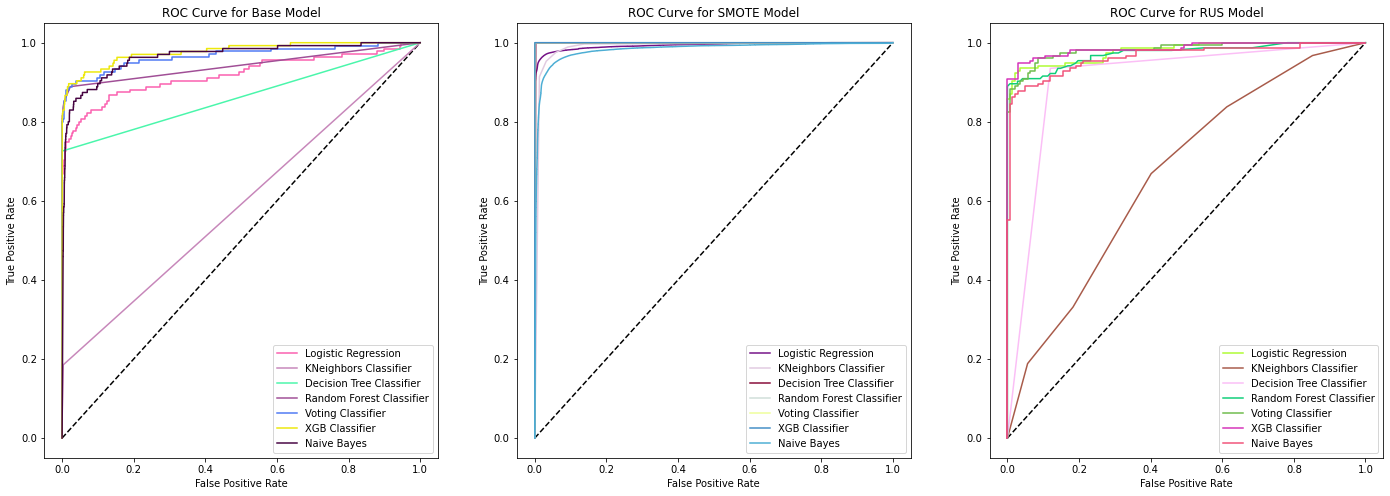

In [25]:
# empty dictionaries to hold the roc values
roc_results_base = {}
roc_results_smote = {}
roc_results_rus = {}

# get the fpr and tpr for each set of models
for model in cm_base.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_base.y_test, cm_base.model_predicts_proba[model][:, 1])

    roc_results_base[model] = [fpr, tpr, thresholds]

for model in cm_smote.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_smote.y_test, cm_smote.model_predicts_proba[model][:, 1])

    roc_results_smote[model] = [fpr, tpr, thresholds]

for model in cm_rus.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_rus.y_test, cm_rus.model_predicts_proba[model][:, 1])

    roc_results_rus[model] = [fpr, tpr, thresholds]

# three subplots please
fig, ((ax0, ax1, ax2)) = plt.subplots(1, 3, figsize=(24, 8))
# fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(15, 8))

# base model
ax0.plot([0, 1], [0, 1], 'k--')
for model in roc_results_base:
    ax0.plot(roc_results_base[model][0],
             roc_results_base[model][1], c=np.random.rand(3,), label=cm_base.model_abr[model])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')

ax0.legend()
ax0.set_title('ROC Curve for Base Model')

# SMOTE model
ax1.plot([0, 1], [0, 1], 'k--')
for model in roc_results_smote:
    ax1.plot(roc_results_smote[model][0],
             roc_results_smote[model][1], c=np.random.rand(3,), label=cm_smote.model_abr[model])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

ax1.legend()
ax1.set_title('ROC Curve for SMOTE Model')

# RUS model
ax2.plot([0, 1], [0, 1], 'k--')
for model in roc_results_rus:
    ax2.plot(roc_results_rus[model][0],
             roc_results_rus[model][1], c=np.random.rand(3,), label=cm_rus.model_abr[model])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')

ax2.legend()
ax2.set_title('ROC Curve for RUS Model')



## AUC

In [26]:
# table headers and a dictionary to hold the values
headers = ['AUC (Base Model)', 'AUC (SMOTE Model)', 'AUC (RUS Model)']
# headers = ['AUC (Base Model)', 'AUC (RUS Model)']
tbl_data_dict = {}

# loop over the classifier models and then their keys abbreviated keys
for model in [cm_base, cm_smote, cm_rus]:
# for model in [cm_base, cm_rus]:
    for k in model.model_abr:
        auc = roc_auc_score(model.y_test, model.model_predicts_proba[k][:, 1])
        tbl_data_dict.setdefault(model.model_abr[k], []).append(auc)

# create the table data from the dictionary created above
# tabulate doesn't take table data in the form of dictionary created above
tbldata = []
for k, v in tbl_data_dict.items():
    tbldata.append([k] + v)

print(tabulate(tbldata, headers=headers, tablefmt='pretty'))


+--------------------------+--------------------+--------------------+--------------------+
|                          |  AUC (Base Model)  | AUC (SMOTE Model)  |  AUC (RUS Model)   |
+--------------------------+--------------------+--------------------+--------------------+
|   Logistic Regression    | 0.9185767823433693 | 0.993057177690646  | 0.9795134443021767 |
|  KNeighbors Classifier   | 0.5910337964916668 | 0.9883800208258655 | 0.6681223705871593 |
| Decision Tree Classifier | 0.8627519628222962 | 0.9981253712065694 | 0.9076733126028901 |
| Random Forest Classifier | 0.942495992733954  | 0.9999929887888463 | 0.9732257179440279 |
|    Voting Classifier     | 0.9661936963925055 | 0.999982229880352  | 0.9826687397109932 |
|      XGB Classifier      | 0.9775313504529991 | 0.9999928850106877 | 0.9854124748490947 |
|       Naive Bayes        | 0.9647554655982938 | 0.9823156754738871 | 0.9640570696908726 |
+--------------------------+--------------------+--------------------+----------

In [27]:
# df_auc = pd.DataFrame(['Base', 'RUS'], columns=['Dataset Type']).merge(
#     right=pd.DataFrame(tbl_data_dict), left_index=True, right_index=True)
df_auc = pd.DataFrame(['Base', 'SMOTE', 'RUS'], columns=['Dataset Type']).merge(
    right=pd.DataFrame(tbl_data_dict), left_index=True, right_index=True)
df_auc

,Dataset Type,Logistic Regression,KNeighbors Classifier,Decision Tree Classifier,Random Forest Classifier,Voting Classifier,XGB Classifier,Naive Bayes
0,Base,0.918577,0.591034,0.862752,0.942496,0.966194,0.977531,0.964755
1,SMOTE,0.993057,0.988380,0.998125,0.999993,0.999982,0.999993,0.982316
2,RUS,0.979513,0.668122,0.907673,0.973226,0.982669,0.985412,0.964057


In [28]:
df_auc.melt(id_vars=['Dataset Type'], var_name='Model', value_name='AUC')

,Dataset Type,Model,AUC
0,Base,Logistic Regression,0.918577
1,SMOTE,Logistic Regression,0.993057
2,RUS,Logistic Regression,0.979513
3,Base,KNeighbors Classifier,0.591034
4,SMOTE,KNeighbors Classifier,0.988380
5,RUS,KNeighbors Classifier,0.668122
6,Base,Decision Tree Classifier,0.862752
7,SMOTE,Decision Tree Classifier,0.998125
8,RUS,Decision Tree Classifier,0.907673
9,Base,Random Forest Classifier,0.942496


Text(0.5, 1.0, 'AUC for Models')

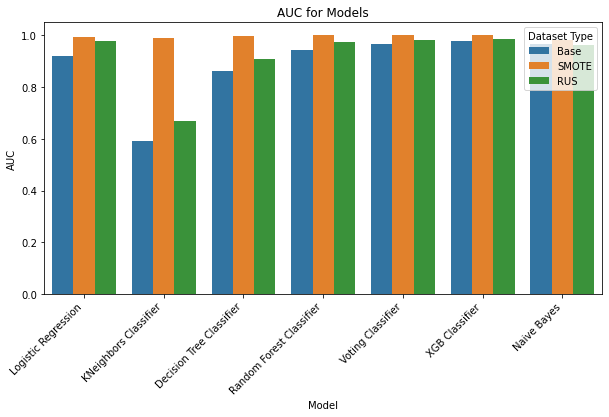

In [29]:
fig, axes = plt.subplots(figsize=(10, 5))
ax = sns.barplot(df_auc.melt(id_vars=['Dataset Type'], var_name='Model',
                 value_name='AUC'), x='Model', y='AUC', hue='Dataset Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('AUC for Models')